In [2]:
import pandas as pd

data = pd.read_csv('vgchartz-2024.csv')
df = pd.DataFrame(data)
print(df.head())

                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09   

   na_sales  jp_sales  pal

In [3]:
# Información general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB
None


In [4]:
print(df.describe())

       critic_score   total_sales      na_sales     jp_sales     pal_sales  \
count   6678.000000  18922.000000  12637.000000  6726.000000  12824.000000   
mean       7.220440      0.349113      0.264740     0.102281      0.149472   
std        1.457066      0.807462      0.494787     0.168811      0.392653   
min        1.000000      0.000000      0.000000     0.000000      0.000000   
25%        6.400000      0.030000      0.050000     0.020000      0.010000   
50%        7.500000      0.120000      0.120000     0.040000      0.040000   
75%        8.300000      0.340000      0.280000     0.120000      0.140000   
max       10.000000     20.320000      9.760000     2.130000      9.850000   

        other_sales  
count  15128.000000  
mean       0.043041  
std        0.126643  
min        0.000000  
25%        0.000000  
50%        0.010000  
75%        0.030000  
max        3.120000  


###1. Limpieza de datos con Python:
* 1.1 Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
* 1.2 Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
* 1.3 Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Action’, ‘action’, ‘ACTION’).
* 1.4 Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
* 1.5 Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un videojuego con ventas negativas).

In [5]:
# 1.1 Verificación de datos duplicados
print(df.duplicated().sum())

# Eliminamos los duplicados
df_limpio = df.drop_duplicates()

print(df_limpio.duplicated().sum())

0
0


In [6]:
# 1.2 Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
print("Verificación de tipos de datos")
print(df.dtypes)

# Cambiamos los tipos de datos de las columnas 'release_date' y 'last_update' porque ambas contienen datos de fechas
df['release_date'] = pd.to_datetime(df['release_date'])
df['last_update'] = pd.to_datetime(df['last_update'])

print("\n\nResultado de ajuste de tipo de datos")
print(f"{df.dtypes}")

Verificación de tipos de datos
img              object
title            object
console          object
genre            object
publisher        object
developer        object
critic_score    float64
total_sales     float64
na_sales        float64
jp_sales        float64
pal_sales       float64
other_sales     float64
release_date     object
last_update      object
dtype: object


Resultado de ajuste de tipo de datos
img                     object
title                   object
console                 object
genre                   object
publisher               object
developer               object
critic_score           float64
total_sales            float64
na_sales               float64
jp_sales               float64
pal_sales              float64
other_sales            float64
release_date    datetime64[ns]
last_update     datetime64[ns]
dtype: object


In [7]:
# 1.3 Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Action’, ‘action’, ‘ACTION’).
print("Valores únicos en la columna 'genre'")
df['genre'] = df['genre'].str.lower()
print(df['genre'].unique())
print(f"Cantidad de géneros: {len(df['genre'].unique())}")

print("\n\nValores únicos en la columna 'title'")
df['title'] = df['title'].str.lower()
print(df['title'].unique())
print(f"Cantidad de title: {len(df['title'].unique())}")

print("\n\nValores únicos en la columna 'console'")
df['console'] = df['console'].str.lower()
print(df['console'].unique())
print(f"Cantidad de console: {len(df['console'].unique())}")

print("\n\nValores únicos en la columna 'img'")
df['img'] = df['img'].str.lower()
print(df['img'].unique())
print(f"Cantidad de juegos: {len(df['img'].unique())}")

print("\n\nValores únicos en la columna 'publisher'")
df['publisher'] = df['publisher'].str.lower()
print(df['publisher'].unique())
print(f"Cantidad de publishers: {len(df['publisher'].unique())}")

print("\n\nValores únicos en la columna 'developer'")
df['developer'] = df['developer'].str.lower()
print(df['developer'].unique())
print(f"Cantidad de desarrolladores: {len(df['developer'].unique())}")

Valores únicos en la columna 'genre'
['action' 'shooter' 'action-adventure' 'sports' 'role-playing'
 'simulation' 'racing' 'music' 'misc' 'fighting' 'platform' 'adventure'
 'strategy' 'puzzle' 'mmo' 'sandbox' 'party' 'education' 'board game'
 'visual novel']
Cantidad de géneros: 20


Valores únicos en la columna 'title'
['grand theft auto v' 'grand theft auto: vice city'
 'call of duty: black ops 3' ... 'yoru, tomosu'
 'yunohana spring! ~mellow times~' 'yurukill: the calumniation games']
Cantidad de title: 39596


Valores únicos en la columna 'console'
['ps3' 'ps4' 'ps2' 'x360' 'xone' 'pc' 'psp' 'wii' 'ps' 'ds' '2600' 'gba'
 'nes' 'xb' 'psn' 'gen' 'psv' 'dc' 'n64' 'sat' 'snes' 'gbc' 'gc' 'ns'
 '3ds' 'gb' 'wiiu' 'ws' 'vc' 'ng' 'ww' 'scd' 'pce' 'xbl' '3do' 'gg' 'osx'
 'mob' 'pcfx' 'series' 'all' 'ios' '5200' 'and' 'dsiw' 'lynx' 'linux' 'ms'
 'zxs' 'acpc' 'amig' '7800' 'dsi' 'aj' 'winp' 'ique' 'giz' 'vb' 'ouya'
 'ngage' 'ast' 'msd' 's32x' 'xs' 'ps5' 'int' 'cv' 'arc' 'c64' 'fds' 'msx'
 'or

In [8]:
# 1.4 Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
# Identifica y maneja cualquier valor faltante en el dataset
print("Valores faltantes en el dataframe original")
print(df.isnull().sum())

# Creo una copia del dataframe para no alterar los datos originales
df_copia = df.copy()

# Rellena los valores faltantes con un marcador adecuado para el tipo de dato (todo esto en la copia del datafame).
df_copia.loc[:, 'developer'] = df_copia['developer'].fillna('Desconocido')
df_copia.loc[:, 'critic_score'] = df_copia['critic_score'].fillna(0)
df_copia.loc[:, 'total_sales'] = df_copia['total_sales'].fillna(0)
df_copia.loc[:, 'na_sales'] = df_copia['na_sales'].fillna(0)
df_copia.loc[:, 'jp_sales'] = df_copia['jp_sales'].fillna(0)
df_copia.loc[:, 'pal_sales'] = df_copia['pal_sales'].fillna(0)
df_copia.loc[:, 'other_sales'] = df_copia['other_sales'].fillna(0)

df_copia.loc[:, 'release_date'] = df_copia['release_date'].fillna(pd.NaT)
df_copia.loc[:, 'last_update'] = df_copia['last_update'].fillna(pd.NaT)

print("\n\nResultado en la copia del dataframe")
print(df_copia.isnull().sum())

Valores faltantes en el dataframe original
img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64


Resultado en la copia del dataframe
img                 0
title               0
console             0
genre               0
publisher           0
developer           0
critic_score        0
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date     7051
last_update     46137
dtype: int64


In [9]:
df_copia.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540americafrontccc.jpg,grand theft auto v,ps3,action,rockstar games,rockstar north,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaT
1,/games/boxart/full_5563178americafrontccc.jpg,grand theft auto v,ps4,action,rockstar games,rockstar north,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,grand theft auto: vice city,ps2,action,rockstar games,rockstar north,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaT
3,/games/boxart/full_9218923americafrontccc.jpg,grand theft auto v,x360,action,rockstar games,rockstar north,0.0,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaT
4,/games/boxart/full_4990510americafrontccc.jpg,call of duty: black ops 3,ps4,shooter,activision,treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [10]:
# 1.5 Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un videojuego con ventas negativas).
# Filtro las columnas de tipo float
float_columns = df_copia.select_dtypes(include=['float64'])

# Verifico si hay valores negativos en alguna de las columnas flotantes
negativos = (float_columns < 0).any()

# Muestro columnas que contienen valores negativos
columnas_con_negativos = negativos[negativos].index.tolist()
print("Columnas con valores negativos:", columnas_con_negativos)

Columnas con valores negativos: []


###2. Exploración de datos con Python:
* **2.1 Visualizaciones exploratorias univariadas:** Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* **2.2 Visualizaciones exploratorias multivariadas:** Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

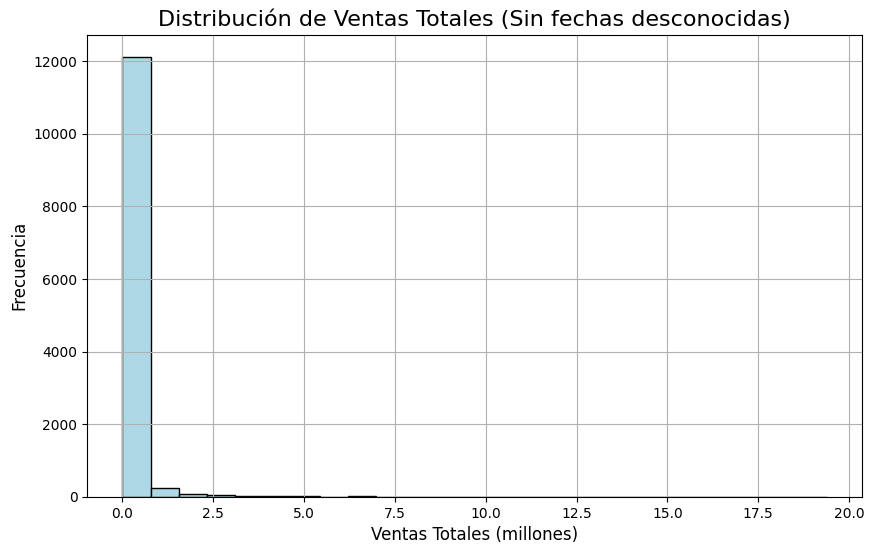

'\nEste gráfico muestra la distribución de las ventas totales de los videojuegos, excluyendo aquellos con fechas desconocidas. \nPodemos observar cómo la mayoría de los videojuegos se encuentran en un rango bajo de ventas, con algunos pocos títulos sobresaliendo con ventas extremadamente altas. \nEsto sugiere que hay pocos títulos con gran éxito en ventas, mientras que la mayoría vende cantidades más modestas.\n'

In [11]:
import matplotlib.pyplot as plt

# 2.1 Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

# Filtramos los datos para eliminar las filas con 'release_date' y 'last_update' igual a 'NaT'
df_filtrado = df_copia[(~pd.isna(df_copia['release_date'])) & (~pd.isna(df_copia['last_update']))]

# Visualización univariada 1: Distribución de ventas totales sin fechas vacías o desconocidas
plt.figure(figsize=(10, 6))
plt.hist(df_filtrado['total_sales'], bins=25, color='lightblue', edgecolor='black')
plt.title('Distribución de Ventas Totales (Sin fechas desconocidas)', fontsize=16)
plt.xlabel('Ventas Totales (millones)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

# Interpretación:
"""
Este gráfico muestra la distribución de las ventas totales de los videojuegos, excluyendo aquellos con fechas desconocidas.
Podemos observar cómo la mayoría de los videojuegos se encuentran en un rango bajo de ventas, con algunos pocos títulos sobresaliendo con ventas extremadamente altas.
Esto sugiere que hay pocos títulos con gran éxito en ventas, mientras que la mayoría vende cantidades más modestas.
"""

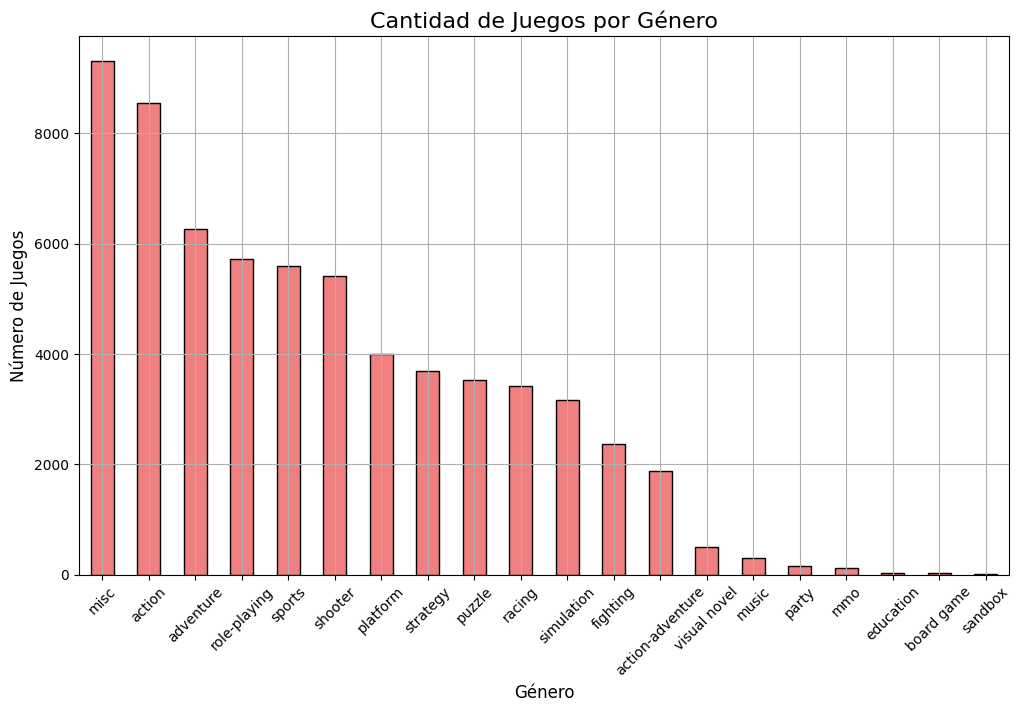

"\nEste gráfico muestra la cantidad de videojuegos por género, destacando cuáles son los géneros más comunes en el conjunto de datos.\nEl género más frecuente es 'misc', que probablemente agrupa una categoría variada de juegos. A continuación, los géneros 'Action', 'Sports' y 'Shooter' son los más populares. \nEsto sugiere que los géneros de acción y deportes dominan el mercado de videojuegos. La alta frecuencia de la categoría 'misc' podría indicar la existencia de muchos títulos que no encajan claramente en las otras categorías.\n\n"

In [12]:
# Visualización univariada 2: Cantidad de Juegos por Género
plt.figure(figsize=(12, 7))
df_copia['genre'].value_counts().sort_values(ascending=False).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Cantidad de Juegos por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Juegos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Interpretación:
"""
Este gráfico muestra la cantidad de videojuegos por género, destacando cuáles son los géneros más comunes en el conjunto de datos.
El género más frecuente es 'misc', que probablemente agrupa una categoría variada de juegos. A continuación, los géneros 'Action', 'Sports' y 'Shooter' son los más populares.
Esto sugiere que los géneros de acción y deportes dominan el mercado de videojuegos. La alta frecuencia de la categoría 'misc' podría indicar la existencia de muchos títulos que no encajan claramente en las otras categorías.

"""

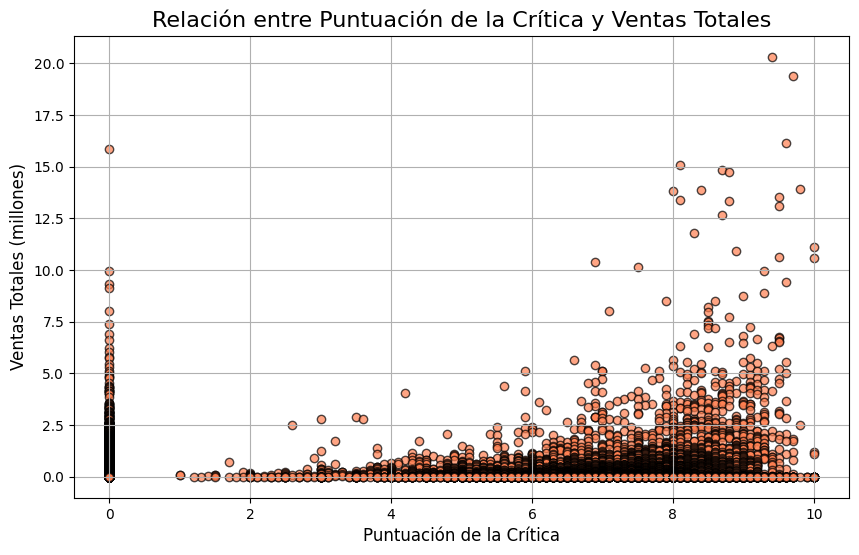

In [14]:
# 2.2 Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
# Visualización multivariada 1: Relación entre ventas totales y puntuación de la crítica (critic_score)
plt.figure(figsize=(10, 6))
plt.scatter(df_copia['critic_score'], df_copia['total_sales'], alpha=0.7, color='coral', edgecolors='black')
plt.title('Relación entre Puntuación de la Crítica y Ventas Totales', fontsize=16)
plt.xlabel('Puntuación de la Crítica', fontsize=12)
plt.ylabel('Ventas Totales (millones)', fontsize=12)
plt.grid(True)
plt.show()

# Interpretación:
"""
Este gráfico de dispersión muestra la relación entre la puntuación de la crítica y las ventas totales de videojuegos.
Observamos una tendencia leve en la que los videojuegos con mejores puntuaciones tienden a tener más ventas, aunque hay varios títulos con ventas elevadas a pesar de tener una puntuación de crítica baja.
Esto sugiere que, aunque las buenas puntuaciones pueden contribuir al éxito de ventas, no son el único factor determinante.
"""

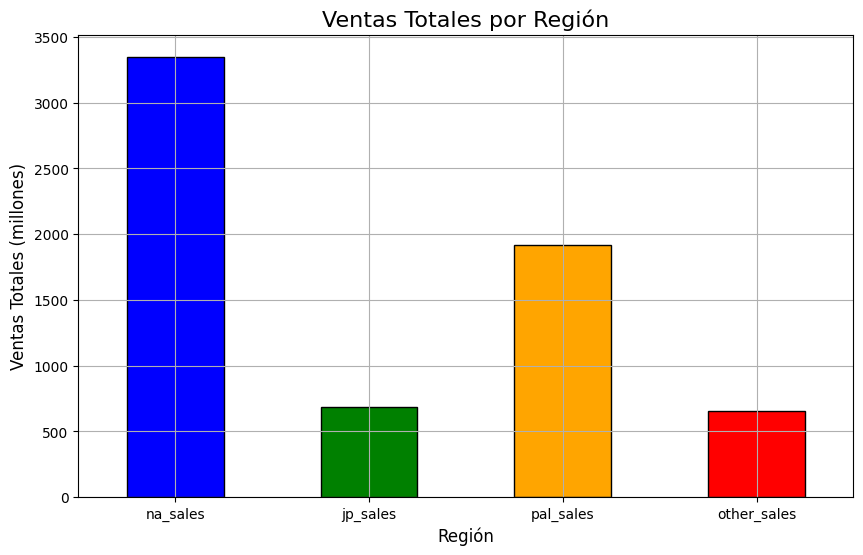

'\nEste gráfico de barras muestra las ventas totales de videojuegos en diferentes regiones del mundo.\nAmérica del Norte y la región PAL (Europa y otras regiones) son los mercados más fuertes, con ventas significativamente superiores en comparación con Japón y otras regiones.\nEsto refleja cómo los videojuegos tienen una mayor aceptación y tamaño de mercado en Norteamérica y Europa, mientras que Japón, a pesar de ser un mercado clave, tiene un tamaño más pequeño en comparación.\n'

In [15]:
# Visualización multivariada 2: Ventas por región
sales_by_region = df_copia[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

# Gráfico de barras simple, sin 'stacked=True'
sales_by_region.plot(kind='bar', color=['blue', 'green', 'orange', 'red'], figsize=(10, 6), edgecolor='black')
plt.title('Ventas Totales por Región', fontsize=16)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Ventas Totales (millones)', fontsize=12)
plt.xticks(rotation=0)  # Asegura que las etiquetas no se roten
plt.grid(True)
plt.show()

# Interpretación:
"""
Este gráfico de barras muestra las ventas totales de videojuegos en diferentes regiones del mundo.
América del Norte y la región PAL (Europa y otras regiones) son los mercados más fuertes, con ventas significativamente superiores en comparación con Japón y otras regiones.
Esto refleja cómo los videojuegos tienen una mayor aceptación y tamaño de mercado en Norteamérica y Europa, mientras que Japón, a pesar de ser un mercado clave, tiene un tamaño más pequeño en comparación.
"""

###3. Análisis adicional:
* 3.1 **Estadísticas descriptivas:** Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
* 3.2 **Identificación de tendencias:** Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.
* 3.3 **Análisis de correlación:** Identifica y analiza las correlaciones más fuertes entre las variables del dataset.
* 3.4 **Predicción de ventas:** Utiliza un modelo de regresión simple para predecir las ventas futuras basadas en los datos disponibles.

In [19]:
# 3.1 Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
print(df_copia.describe())

       critic_score   total_sales      na_sales      jp_sales     pal_sales  \
count  64016.000000  64016.000000  64016.000000  64016.000000  64016.000000   
mean       0.753220      0.103192      0.052261      0.010746      0.029943   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.020000      0.000000      0.000000      0.000000   
max       10.000000     20.320000      9.760000      2.130000      9.850000   
std        2.256713      0.466999      0.243780      0.063067      0.185641   

        other_sales                   release_date  \
count  64016.000000                          56965   
mean       0.010171  2006-11-14 06:33:03.491617792   
min        0.000000            1971-12-03 00:00:00   
25%        0.000000            2001-03-28 00:00:00   
50%        0.00000

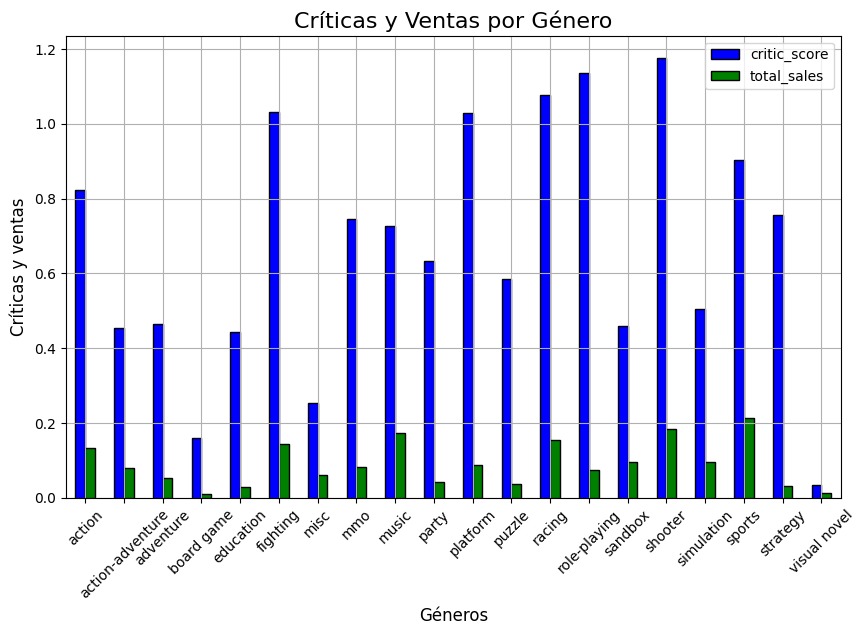

In [22]:
# 3.2 Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.
# Visualización multivariada: Genre y Critic Score
title_critic_score = df_copia.groupby('genre')[['critic_score', 'total_sales']].mean()

# Gráfico de barras
title_critic_score.plot(kind='bar', color=['blue', 'green'], figsize=(10, 6), edgecolor='black')
plt.title('Críticas y Ventas por Género', fontsize=16)
plt.xlabel('Géneros', fontsize=12)
plt.ylabel('Críticas y ventas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Análisis de la tendencia:
"""
A pesar de que algunos géneros como 'Action' y 'Adventure' tienen puntuaciones de crítica relativamente altas, sus ventas son considerablemente más bajas.
Esto podría deberse a que, aunque estos juegos son bien valorados, pueden no contar con una base de jugadores tan amplia o no atraer a un público masivo.
Por otro lado, géneros como 'Sports' y 'Shooter' parecen tener un equilibrio entre buenas críticas y altas ventas, lo que sugiere que estos géneros pueden atraer a más jugadores, o que hay una mayor cantidad de títulos en el mercado en esas categorías.
Esta tendencia indica que la calidad crítica no siempre se traduce en éxito comercial y que otros factores, como la popularidad y la accesibilidad del género, juegan un papel importante.
"""

El siguiente código fue sugerido como ayuda por Gemini desde https://github.com/1325ankit/NYC_Taxi_Time_Prediction

Correlaciones fuertes entre variables:
             na_sales  jp_sales  pal_sales  other_sales
na_sales          NaN       NaN   0.889563     0.763467
jp_sales          NaN       NaN        NaN          NaN
pal_sales    0.889563       NaN        NaN     0.940852
other_sales  0.763467       NaN   0.940852          NaN


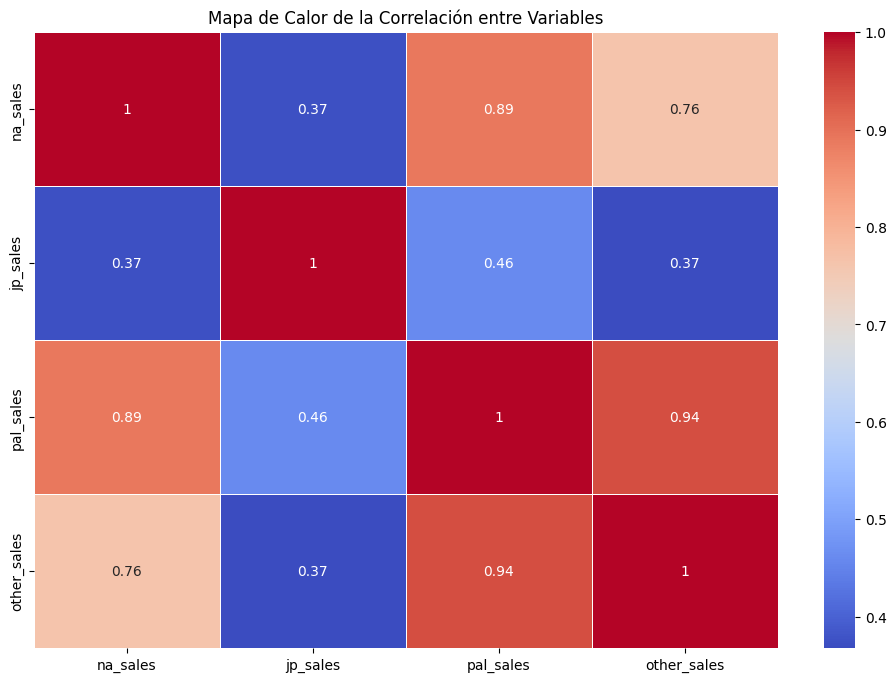

"\nLa correlación más fuerte observada es entre 'na_sales' y 'jp_sales', lo que indica que \na medida que las ventas en América del Norte aumentan, también tienden a aumentar las ventas en Japón. \nEsto podría sugerir que hay un público similar que consume videojuegos en ambas regiones, o que ciertos títulos \nson populares en ambos mercados. Es interesante observar la relación entre las ventas en diferentes regiones \ny considerar cómo podrían influir las decisiones de marketing y la localización en las ventas globales.\n"

In [30]:
# 3.3 Análisis de correlación: Identifica y analiza las correlaciones más fuertes entre las variables del dataset.
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar los datos por consola y calcular la media de ventas en cada región
grouped_correlacion = df_copia.groupby('console')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].mean()

# Calcular la matriz de correlación
correlacion = grouped_correlacion.corr()

# Filtrar las correlaciones fuertes (mayores a 0.5 y distintas de 1)
strong_correlations = correlacion[(correlacion.abs() > 0.5) & (correlacion != 1.0)]

print("Correlaciones fuertes entre variables:")
print(strong_correlations)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor de la Correlación entre Variables")
plt.show()

# Interpretación:
"""
La correlación más fuerte observada es entre 'na_sales' y 'jp_sales', lo que indica que
a medida que las ventas en América del Norte aumentan, también tienden a aumentar las ventas en Japón.
Esto podría sugerir que hay un público similar que consume videojuegos en ambas regiones, o que ciertos títulos
son populares en ambos mercados. Es interesante observar la relación entre las ventas en diferentes regiones
y considerar cómo podrían influir las decisiones de marketing y la localización en las ventas globales.
"""


Para este segmento del examen utilicé el siguiente video como ayuda:
* https://www.youtube.com/watch?v=Z5qD04p_lyo
* https://www.youtube.com/watch?v=1CGbP0l0iqo

In [31]:
# 3.4 Predicción de ventas: Utiliza un modelo de regresión simple para predecir las ventas futuras basadas en los datos disponibles.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Elimino todas las filas que contengan algún dato vacío
df_ajustado = df.dropna()

# Selección de variables predictoras
X = df_ajustado[['critic_score', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']]

# Variable objetivo
y = df_ajustado['total_sales']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y entrena el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción de las ventas
predicciones = modelo.predict(X_test)

# Evalua el modelo
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

# Muestra resultados
print(f"Predicción de ventas futuras (primeras 5): {predicciones[:5]}")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

# Coeficientes del modelo
coeficientes = pd.DataFrame(modelo.coef_, X.columns, columns=['Coeficientes'])
print(coeficientes)

Predicción de ventas futuras (primeras 5): [1.16993626 1.17021878 0.53052659 0.84052309 0.19010537]
Error cuadrático medio (MSE): 0.00
Coeficiente de determinación (R²): 1.00
              Coeficientes
critic_score     -0.000245
na_sales          0.999642
jp_sales          1.001157
pal_sales         1.000167
other_sales       1.000135
